The goal of this notebook is to conduct the Exploratory Data Analysis (EDA).

## Imports

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme() 

## Reading Data

In [2]:
# Load the dataset
data=pd.read_csv('data/aug_train.csv')

## Data Inspection

In [3]:
# Display the first few rows of the dataset to understand its structure
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Check the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
# Summary statistics for numerical features
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## Exploratory Data Analysis

In [6]:
data.drop("enrollee_id", axis=1, inplace=True)

In [7]:
X=data[data.columns[:-1]]
y=data['target']

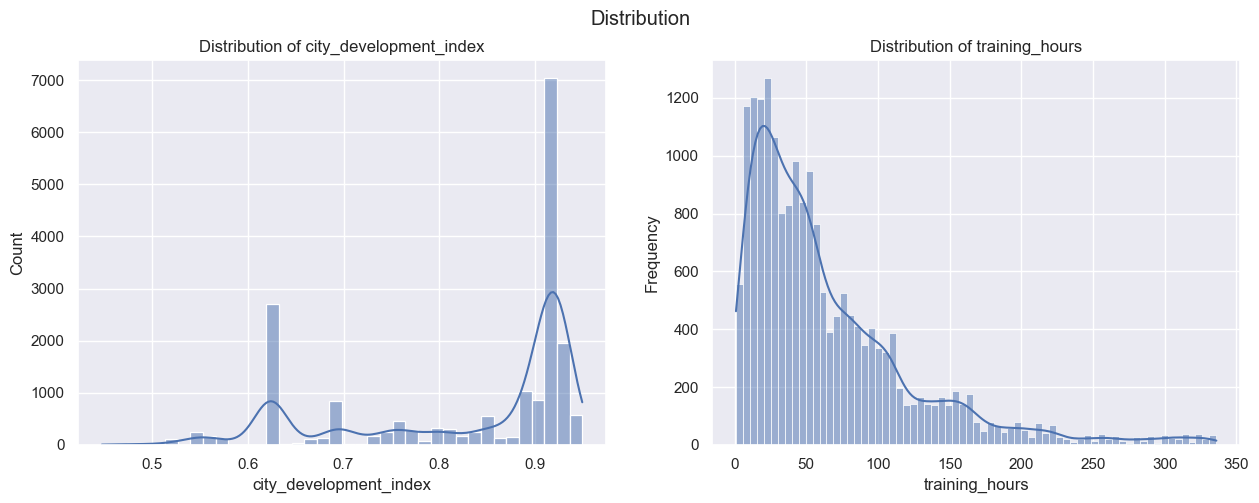

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution')

numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

for idx, feature in enumerate(numerical_features):
    sns.histplot(X[feature], kde=True, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

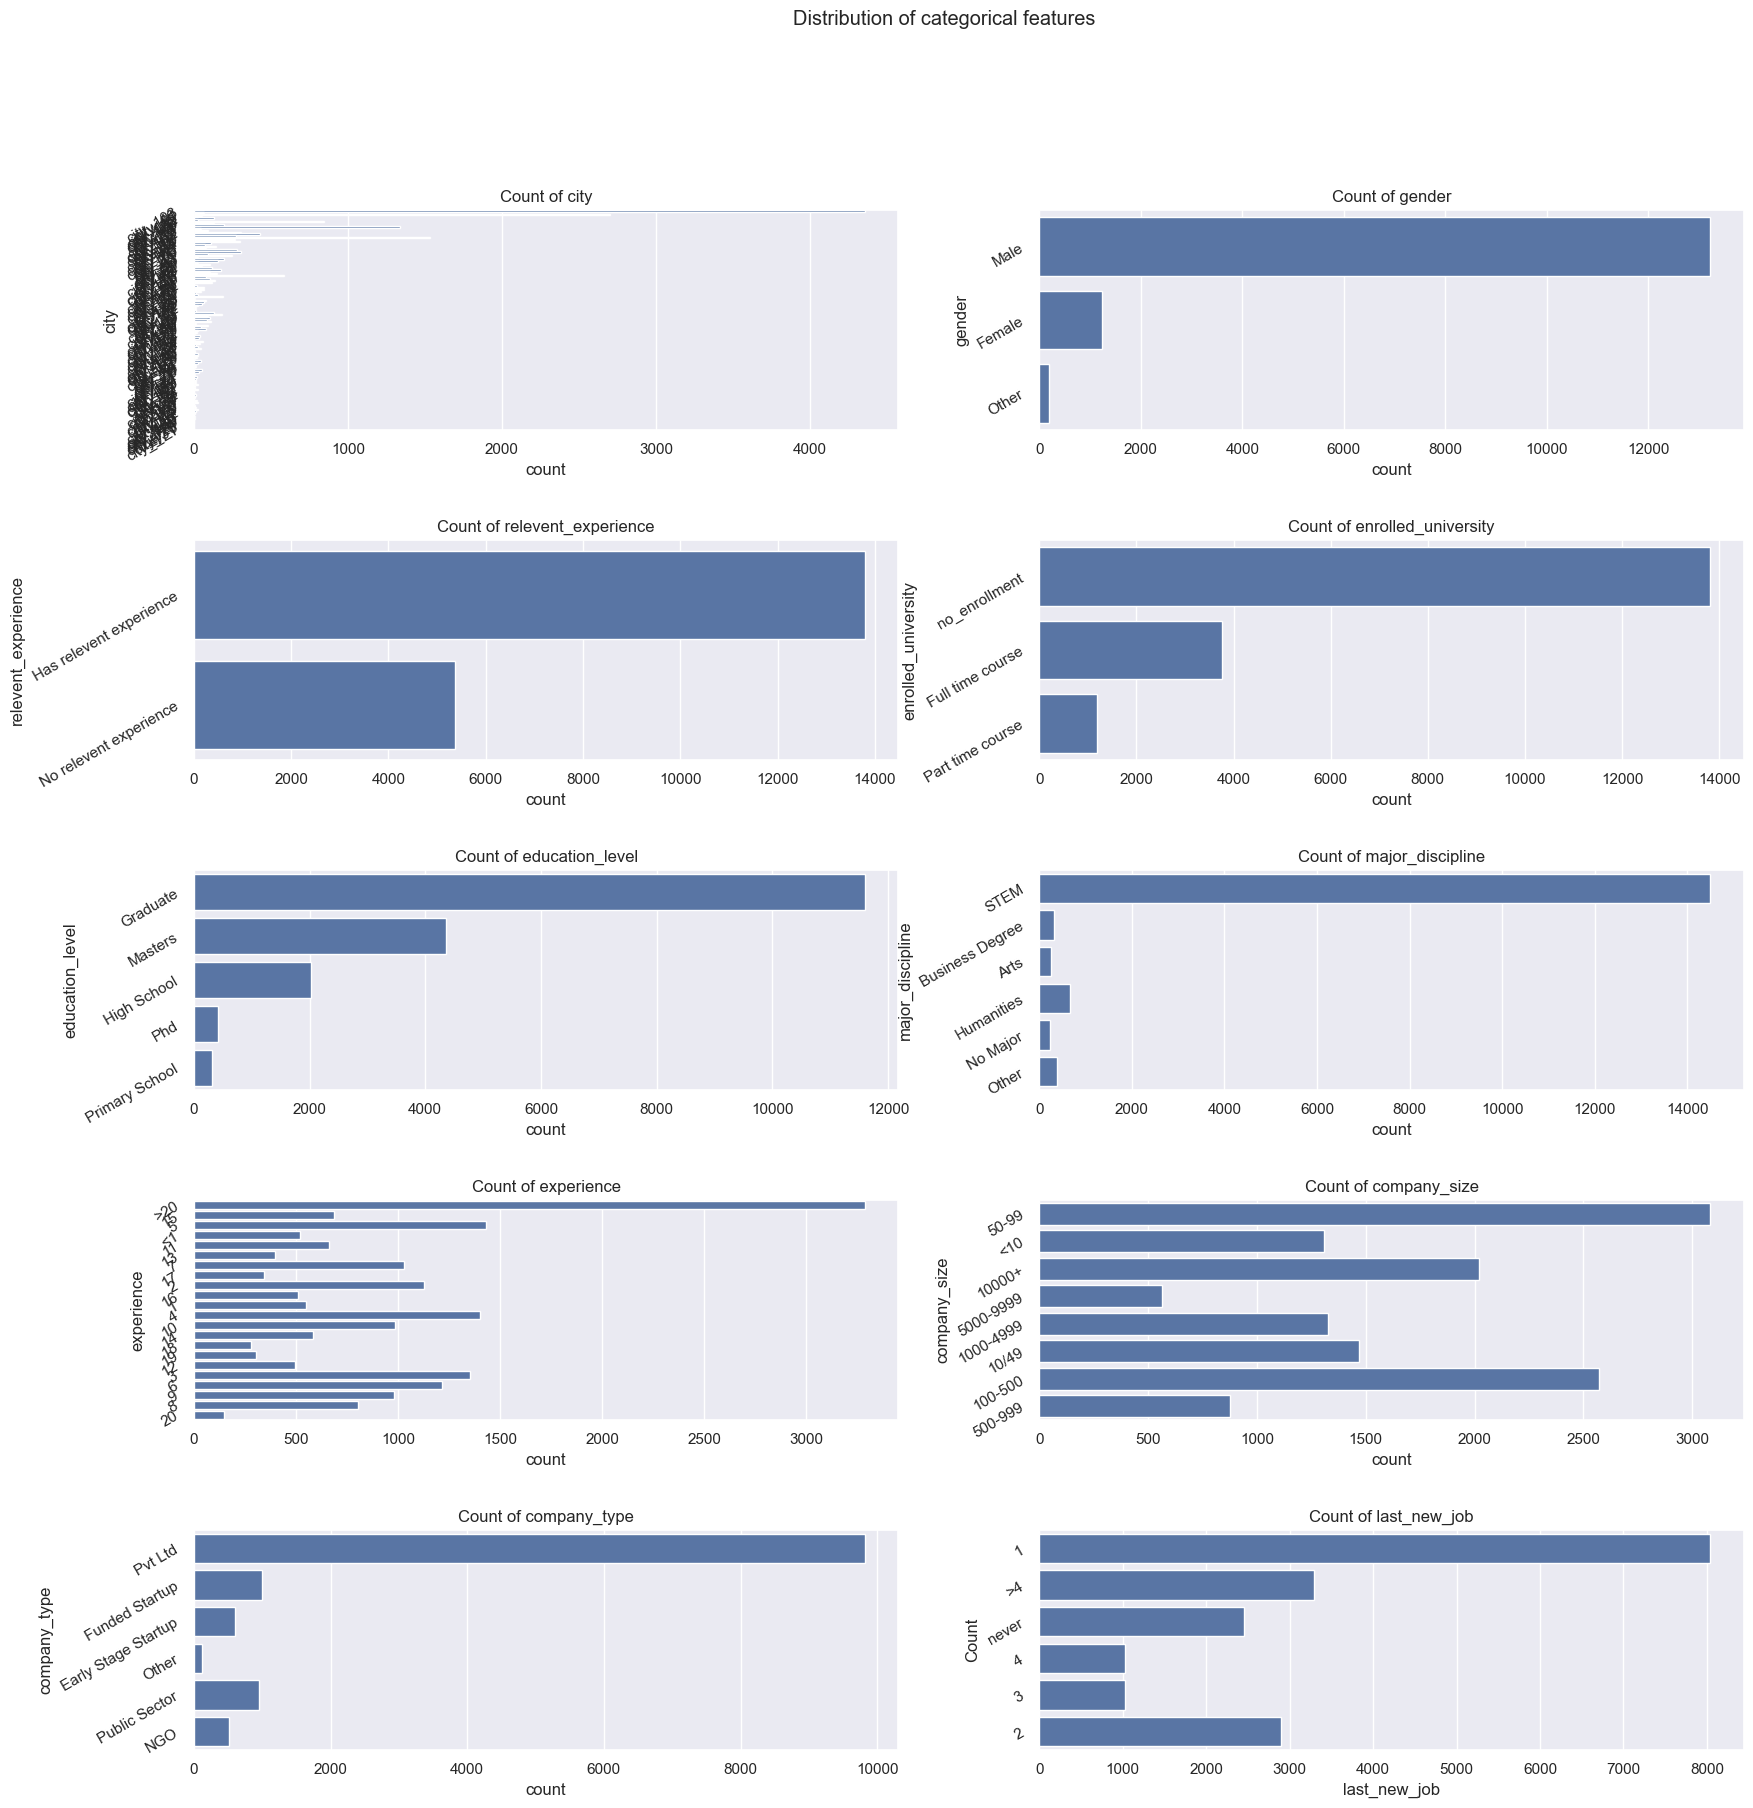

In [24]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Distribution of categorical features')

# Analyze categorical features through counts and visualizations
categorical_features = data.select_dtypes(include=[object]).columns.tolist()

for idx, feature in enumerate(categorical_features):
    sns.countplot(data[feature], ax=axes[idx//2][idx%2])
    axes[idx//2][idx%2].set_title(f"Count of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    axes[idx//2][idx%2].yaxis.set_tick_params(rotation=30)

plt.subplots_adjust(hspace=0.5)  

In [10]:
# Check for missing values
print("\nChecking for missing values:")
missing_values = data.isnull().sum()
print(missing_values)


Checking for missing values:
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


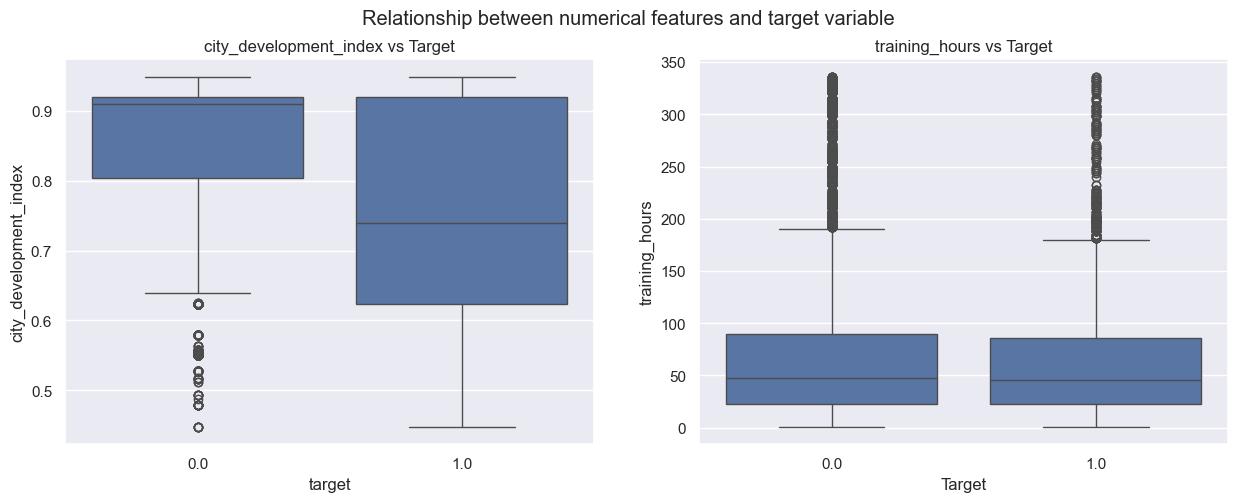

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Relationship between numerical features and target variable')

# Relationship between numerical features and target variable
for idx, feature in enumerate(numerical_features):
    sns.boxplot(x=data['target'], y=data[feature], ax=axes[idx])
    axes[idx].set_title(f"{feature} vs Target")
    plt.xlabel("Target")
    plt.ylabel(feature)


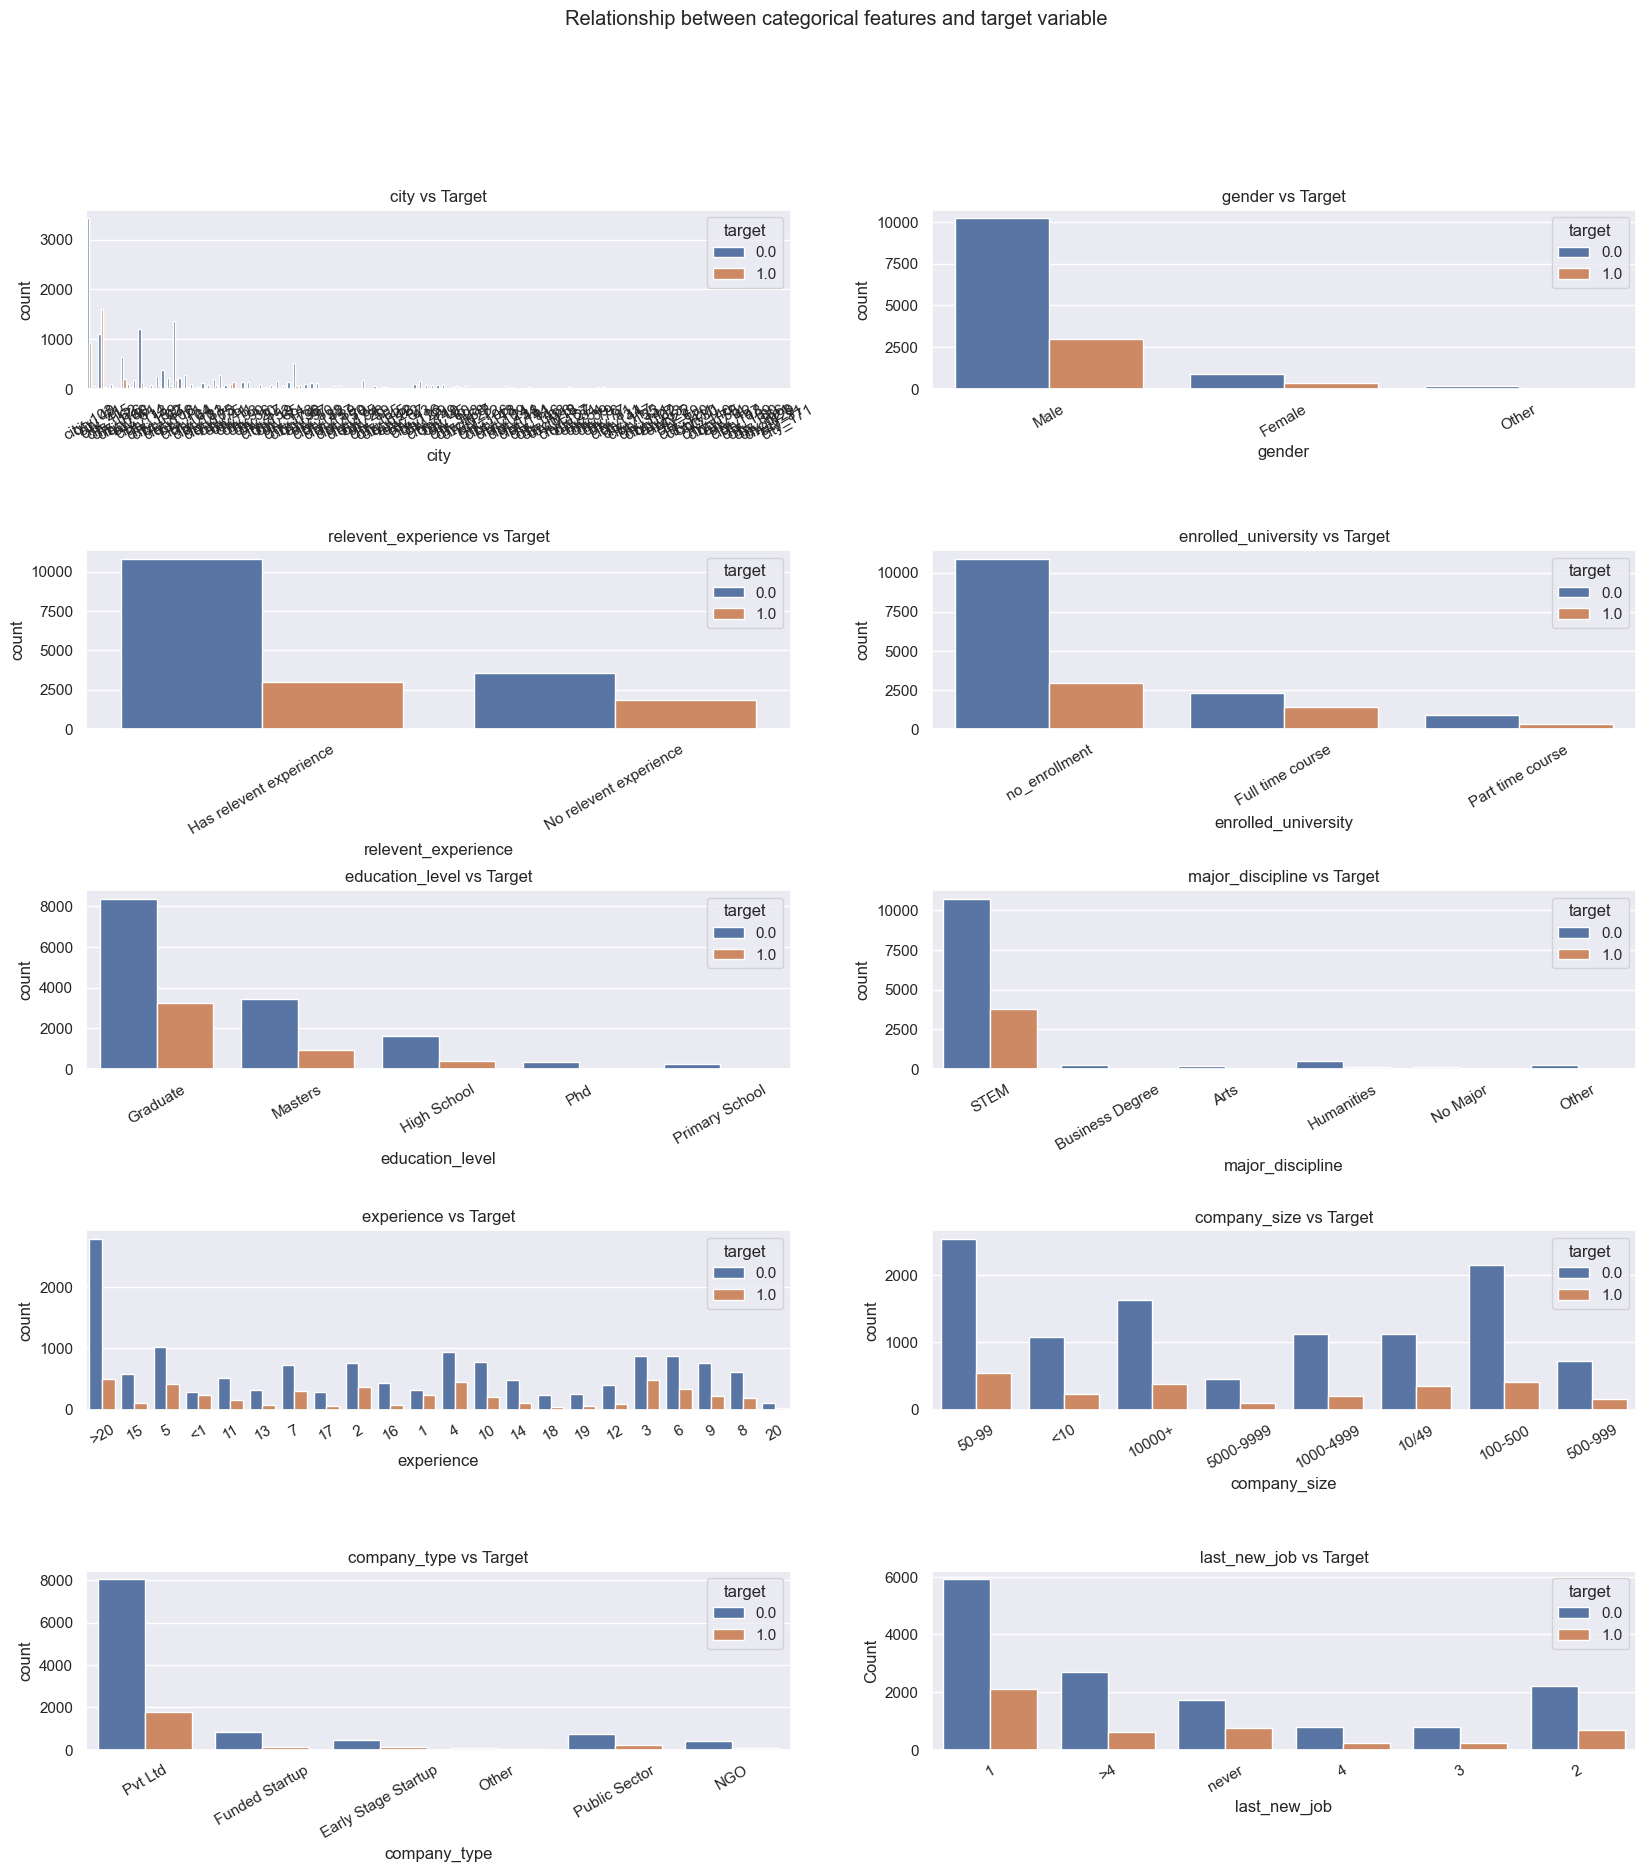

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Relationship between categorical features and target variable')


# Relationship between categorical features and target variable
for idx, feature in enumerate(categorical_features):
    sns.countplot(x=data[feature], hue=data['target'], ax=axes[idx//2][idx%2])
    axes[idx//2][idx%2].set_title(f"{feature} vs Target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    axes[idx//2][idx%2].xaxis.set_tick_params(rotation=30)

plt.subplots_adjust(hspace=0.9)  
